In [1]:
#VISUAL ODOM 

########## LOADING FILES ##################
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
poses = pd.read_csv('../dataset/poses/02.txt', delimiter=' ', header=None)
poses.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,9.043683e-12,2.326809e-11,1.110223e-16,9.043683e-12,1.000000,2.392370e-10,3.330669e-16,2.326810e-11,2.392370e-10,1.000000,-2.220446e-16
1,0.999997,-2.220141e-03,-1.303943e-03,5.542524e-03,2.223603e-03,0.999994,2.659561e-03,-3.047694e-02,1.298030e-03,-2.662451e-03,0.999996,1.528975e+00
2,0.999992,-3.006968e-03,-2.825820e-03,5.664279e-03,3.016952e-03,0.999989,3.535540e-03,-6.012991e-02,2.815159e-03,-3.544035e-03,0.999990,3.052409e+00
3,0.999989,-2.128535e-03,-4.205819e-03,3.267206e-03,2.141750e-03,0.999993,3.139851e-03,-8.838230e-02,4.199105e-03,-3.148823e-03,0.999986,4.566315e+00
4,0.999983,-1.524541e-03,-5.643893e-03,-6.648871e-03,1.542552e-03,0.999994,3.188330e-03,-1.107150e-01,5.638997e-03,-3.196981e-03,0.999979,6.079413e+00


In [3]:
#EXTRACT GROUND TRUTH
groundt = np.zeros((len(poses), 3, 4))
for i in range(len(poses)):
    groundt[i] = np.array(poses.iloc[i]).reshape((3, 4))

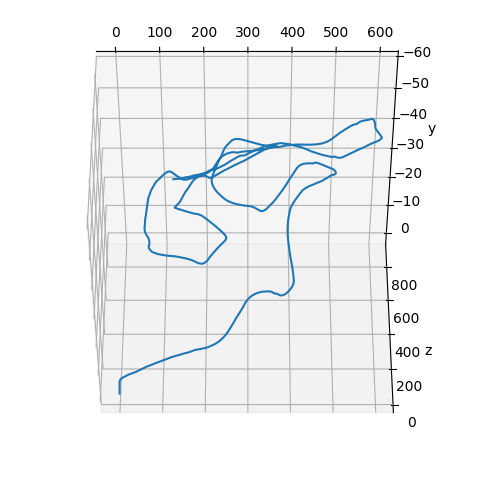

In [4]:
#Ground tuth plotting
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(groundt[:, :, 3][:, 0], groundt[:, :, 3][:, 1], groundt[:, :, 3][:, 2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=-40, azim=270)

LOADING IMAGES

In [5]:
filedir1="C:/Users/achkr/OneDrive/Desktop/ENPM673/VisualOdom/dataset/sequences/02/"
image_file_left=os.listdir(filedir1+'image_1')
image_file_right=os.listdir(filedir1+'image_0')
timel=np.array(pd.read_csv(filedir1+'times.txt',delimiter=' ',header=None))
frames=len(image_file_left)

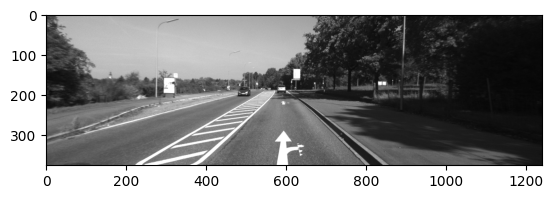

In [7]:
imgL1=cv2.imread("C:/Users/achkr/OneDrive/Desktop/ENPM673/VisualOdom/dataset/sequences/02/image_0/000000.png")
imgR1=cv2.imread("C:/Users/achkr/OneDrive/Desktop/ENPM673/VisualOdom/dataset/sequences/02/image_1/000000.png")
imgL2=cv2.imread("C:/Users/achkr/OneDrive/Desktop/ENPM673/VisualOdom/dataset/sequences/02/image_0/000001.png")
imgR2=cv2.imread("C:/Users/achkr/OneDrive/Desktop/ENPM673/VisualOdom/dataset/sequences/02/image_1/000001.png")

plt.imshow(imgL1)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
#Function to Find Intrinsic Camera Properties using Camera Projection Matrix by decomposing it
#For that we first load the calib file
PMatrix=pd.read_csv('C:/Users/achkr/OneDrive/Desktop/ENPM673/VisualOdom/dataset/sequences/03/calib.txt',delimiter=' ',header=None,index_col=0)
PMatrix

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
P0:,721.5377,0.0,609.5593,0.00000,0.0,721.5377,172.854,0.000000,0.0,0.0,1.0,0.000000
P1:,721.5377,0.0,609.5593,-387.57440,0.0,721.5377,172.854,0.000000,0.0,0.0,1.0,0.000000
P2:,721.5377,0.0,609.5593,44.85728,0.0,721.5377,172.854,0.216379,0.0,0.0,1.0,0.002746
P3:,721.5377,0.0,609.5593,-339.52420,0.0,721.5377,172.854,2.199936,0.0,0.0,1.0,0.002730


In [9]:
#P0 denotes left and P1 denotes right as per dataset 
P=open("C:/Users/achkr/OneDrive/Desktop/ENPM673/VisualOdom/dataset/sequences/02/calib2.txt").readlines()
Pa=P[0].split()
Pb=P[1].split()
num = [float(x) for x in Pa[1:]]
num2= [float(x) for x in Pb[1:]]
Pleft=np.array(num).reshape(3,4)
Pright=np.array(num2).reshape(3,4)
print("Left Camera\n",Pleft,"\n","RIGHT CAMERA\n",Pright)

Left Camera
 [[718.856    0.     607.1928   0.    ]
 [  0.     718.856  185.2157   0.    ]
 [  0.       0.       1.       0.    ]] 
 RIGHT CAMERA
 [[ 718.856     0.      607.1928 -386.1448]
 [   0.      718.856   185.2157    0.    ]
 [   0.        0.        1.        0.    ]]


In [10]:
#Function to Decompose P to K [R|T]. We can use QR Factorization , but we are usinf custom inbuilt function
P1 = np.array(PMatrix.loc['P0:']).reshape((3,4))
def decomposePmat(P):
    k,r,t,_,_,_,_=cv2.decomposeProjectionMatrix(P)
    t=(t/t[3])[:3]
    return k,r,t

Kleft,Rleft,Tleft=decomposePmat(Pleft)
Kright,Rright,Tright=decomposePmat(Pright)
print("LEFT CAMERA K MATRIX : \n",Kleft)
print("LEFT CAMERA R MATRIX : \n",Rleft)
print("LEFT CAMERA T VECTOR : \n",Tleft)

LEFT CAMERA K MATRIX : 
 [[718.856    0.     607.1928]
 [  0.     718.856  185.2157]
 [  0.       0.       1.    ]]
LEFT CAMERA R MATRIX : 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
LEFT CAMERA T VECTOR : 
 [[0.]
 [0.]
 [0.]]


FEATURE MATCHING

In [13]:
#We are implementing two feature tracking techniques. ORB feature tracking is very common for visual odometry and it is hence extended to VSLAM. Now, the second technique we plan to use is 
#the FAST tracking algorithm. This algorithm is quicker in computation time and highly robust as its
# a simple corner detection algorithm that only requires a small number of intensity comparisons.
def ORB(image,mask=None):

    # detect and extract features from the image
    ORB = cv2.ORB_create()
    keyp1, descrip1 = ORB.detectAndCompute(image, mask)
    return keyp1,descrip1


def BFMatch(descrip1,descrip2,thresh,k):
    bf = cv2.BFMatcher_create(cv2.NORM_HAMMING2, crossCheck=False)
    matches1 = bf.knnMatch(descrip1, descrip2, k)
    knn1=[]
    for m,n in matches1:
        if m.distance < n.distance * thresh:
             knn1.append(m)
    return knn1

def match(k1, k2, d1, d2,thresh,k):
    #Now having all keypoints, we will use BF matcher to match descriptor to one image with other using distance calculation
    #All features are compared. We use euclidean distance to match descriptor
    AllMatches =BFMatch(d1,d2,thresh,k)
    matched_pairs=[]
        # construct the two sets of points
        #source points are co-ordinated of keypoints in original plane and dst points are keypoints of
        #matching decscriptors of the second image.
        #We use the DMatch() function to get keypoints values, as its part of output of keyp1. I
    pA = np.float32([k1[m.queryIdx].pt for m in AllMatches])
    pB = np.float32([k2[m.trainIdx].pt for m in AllMatches])
    matched_pairs.append([pA[0], pA[1], pB[0], pB[1]])
    matched_pairs = np.array(matched_pairs).reshape(-1, 4)
    return AllMatches, pA, pB,matched_pairs

def draw_matches(img1,k1,img2,k2,match_pairs):

    match=cv2.drawMatches(img1,k1,img2,k2,match_pairs,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(match)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
def draw_matches2(img1, k1, img2, k2, match_pairs):
    keypoints1 = [cv2.KeyPoint(pt[0], pt[1], 1) for pt in match_pairs[:, :2]]
    print(keypoints1)
    keypoints2 = [cv2.KeyPoint(pt[0], pt[1], 1) for pt in match_pairs[:, 2:]]

    matches = [cv2.DMatch(i, i, 0) for i in range(len(match_pairs))]
    matched_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(matched_img)
    plt.show()


k1,d1=ORB(imgL1)
k2,d2=ORB(imgL2)
print(type(d2))
# bm=BFMatch(d1,d2,0.5)
matches,key1,key2,mp=match(k1,k2,d1,d2,0.8,2)

<class 'numpy.ndarray'>


[< cv2.KeyPoint 0000023D38F14870>, < cv2.KeyPoint 0000023D38F142D0>]


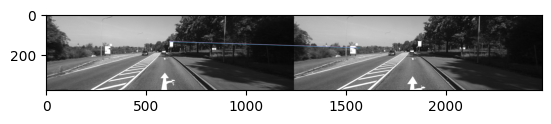

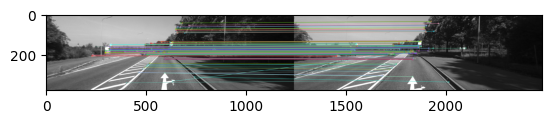

In [14]:
# print(len(mp))
# print( mp[:, 2:])
draw_matches2(imgL1,key1,imgL2,key2,mp)
draw_matches(imgL1,k1,imgL2,k2,matches)

In [15]:
#############CODE FOR FAST##############
def FAST(img,mask=None):
    fast = cv2.FastFeatureDetector_create()
    fast.setThreshold(25)
    fast.setNonmaxSuppression(True)
    keyp1 = fast.detect(img, mask)
    sift=cv2.SIFT_create()
    kp1,des = sift.compute(img, keyp1)
    image=cv2.drawKeypoints(img,keyp1,None,color=(0,255,0),flags=0)
    # plt.imshow(image)
    return keyp1,des,image

2
[< cv2.KeyPoint 0000023D38F163A0>, < cv2.KeyPoint 0000023D38F167C0>]


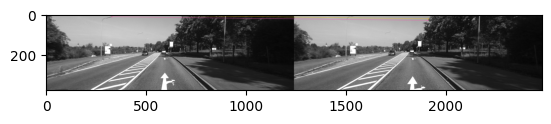

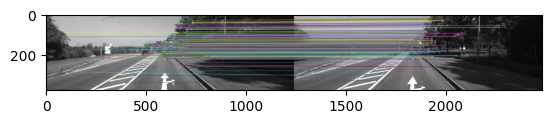

In [16]:
keypf1,des1,img1=FAST(imgL1)
keypf2,des2,img2=FAST(imgL2)
des1 = des1.astype(np.uint8)
des2 = des2.astype(np.uint8)
matchesf,kf1,kf2,mpf=match(keypf1,keypf2,des1,des2,0.8,2)
print(len(mpf))
draw_matches2(imgL1,kf1,imgL2,kf2,mpf)
draw_matches(imgL1,keypf1,imgL2,keypf2,matchesf)



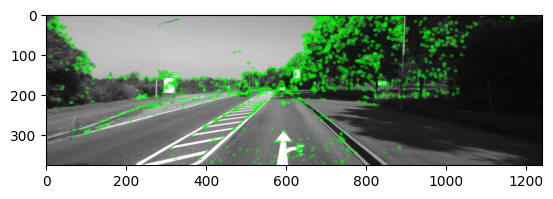

In [17]:
plt.imshow(img1)

COMPUTE DEPTH AND DISPARITY

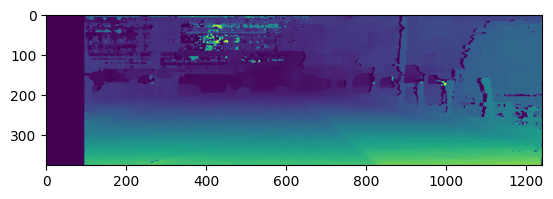

In [18]:
#Computing Disparity for the stereo since these are already rectified
#Sliding window
maxdisp=20
def computedisparity(img1,img2,method,blk=11):
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    if(method=='semi'):
        matcher = cv2.StereoSGBM_create(numDisparities=96,
                                            minDisparity=0,
                                            blockSize=11,
                                            P1 = 8 * 3 * 6 ** 2,
                                            P2 = 32 * 3 * 6 ** 2,
                                            mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
                                        )
    elif (method=='sbm'):
        matcher = cv2.StereoBM_create(numDisparities=96,blockSize=blk)

    disp_map= matcher.compute(img1,img2).astype(np.float32)/16
    # disp_map = (disp_map / disp_map.max()) * 255

    return disp_map
dmap=computedisparity(imgL1,imgR1,"semi")

plt.imshow(dmap)
cv2.waitKey(1)
cv2.destroyAllWindows()

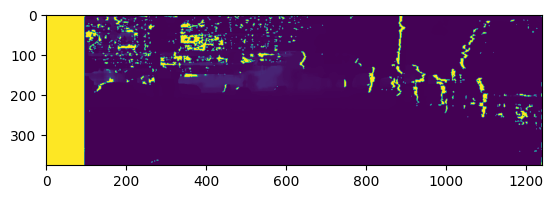

In [19]:
def computedepth(dmap,kleft,tleft,tright):
    #Focal length of camera fx can be identified using K matrix
    focal=kleft[0][0]
    baseline=tright[0]-tleft[0]
    #to avoid division by zero we take 0 to be as 0.01
    dmap=dmap.astype(np.float32)
    dmap[dmap == 0.0] = 0.1
    dmap[dmap == -1.0] = 0.1
    #Depth = f*b/dmap
    depth=np.ones(dmap.shape)
    depth=focal*baseline/dmap
    return depth

depth1=computedepth(dmap,Kleft,Tleft,Tright)
plt.imshow(depth1)
# print(depth1)
# depth1.max()

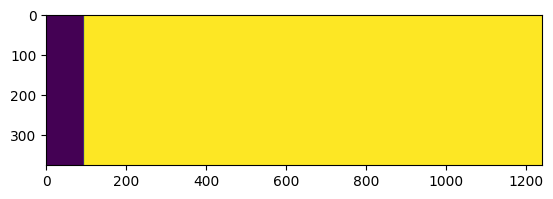

In [20]:
#While calculating the deopth, we can see the extreme right being a single color as this the cause of camera FOV.
#To take out the maximum depth off our process, we now create a layer to speficy that regioon of interest
ROI = np.zeros(imgL1.shape[:2], dtype=np.uint8)
yroi = imgL1.shape[0]
xroi= imgL1.shape[1]
cv2.rectangle(ROI, (95,0), (xroi,yroi), (255), thickness = -1)
plt.imshow(ROI);

In [21]:
def calculateDepthDisp(img1,img2,method,P1,P2,blk=11):
    dmap=computedisparity(img1,img2,method,blk)
    kleft,rleft,tleft=decomposePmat(P1)
    kright,rright,tright=decomposePmat(P2)
    depthinfo=computedepth(dmap,kleft,tleft,tright)
    return depthinfo 

ESTIMATE MOTION

APPROACH -1  USING PNP RANSAC SOLVER

In [23]:
#We will approach this by two methods - One by usng in built PNP RANSAC Solver that gives us the estimate and ther other using a Robust LMedS + RANSAC combo
def motion1(pA, pB, p, depth1, max_depth=3500):
    rot=np.eye(3)
    transvector=np.zeros((3,1))
    #here we can take two approaches 
    #Approach 1 uses the depth and gets the real world 3D points from 2D points as(u,v,depth)
    #This is done by measuring disparity between 2 two views of same with different views. 
    if depth1 is not None:
        dPoints=np.zeros((0,3))
        outlier=[]
        for i ,(x,y) in enumerate(pA):
            m=depth1[int(y),int(x)]
            if m>max_depth:
                outlier.append(i)
                continue
        # Obtaining points from image and reprojecting into 3D world, 
            dPoints = np.vstack([dPoints, np.linalg.inv(p).dot(m*np.array([x, y, 1]))])
        #Now delete the out;iers from image points with best feature
        pA=np.delete(pA,outlier,0)
        # print(len(dPoints))
        pB=np.delete(pB,outlier,0)
        #Get RotMat and TVector from the points projected , and image points are 2D ixel coords in second image
        #PNP takes min no points to solve for translation and takes the solution to check in error margin
        #If the number of points is not above inlier threshold
        _,rot,trans,inliers=cv2.solvePnPRansac(dPoints,pB,p,None)
        #AS per CV2 documentation, the rotation matrix returns axis angle representation,and we need
        #we can use Rodrigues formula
        rmat = cv2.Rodrigues(rot)[0]
 



  
    return rmat, trans, pA, pB
#FOR ORB
rot,trans,_,_=motion1(key1,key2,Kleft,depth1)
print(rot)
print(trans)


[[ 9.99997722e-01  1.95641980e-03  8.52915220e-04]
 [-1.95392182e-03  9.99993828e-01 -2.91981963e-03]
 [-8.58622349e-04  2.91814645e-03  9.99995374e-01]]
[[-0.00499004]
 [ 0.0253749 ]
 [-1.53089448]]


ROTATION 
 [[ 1.00000000e+00 -5.55111512e-17  5.55111512e-17]
 [-1.11022302e-16  1.00000000e+00 -1.66533454e-16]
 [-1.66533454e-16  5.55111512e-17  1.00000000e+00]]


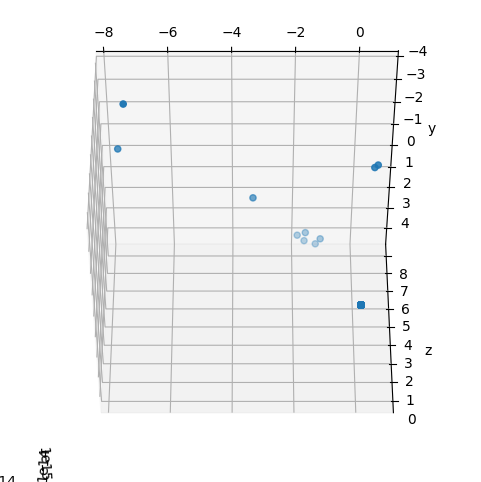

In [29]:
#APPROACH 2 : USE ESSENTIAL MATRIX TO OBTAIN POSE 
def motion2(kp1,kp2,kl,kr):

    E = cv2.findEssentialMat(kp2, kp2, kl,method=cv2.LMEDS)[0]
    _, R, t, mask = cv2.recoverPose(E, kp1, kp2, kl)

    Mr = np.hstack((R, t))
    Ml = np.hstack((np.eye(3, 3), np.zeros((3, 1))))
    Pl = np.dot(kl,  Ml)
    Pr = np.dot(kr,  Mr)
    point_3d_hom = cv2.triangulatePoints(Pl, Pr, np.expand_dims(kp1, axis=1), np.expand_dims(kp2, axis=1))
    point_3d = point_3d_hom / np.tile(point_3d_hom[-1, :], (4, 1))
    point_3d = point_3d[:3, :].T
    return R,t,point_3d

Rot2,trans2,d3=motion2(key1,key2,Kleft,Kright)
print("ROTATION \n",Rot2)    
axx=d3[:,0]
ay=d3[:,1]
az=d3[:,2]
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(axx,ay,az)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=-40, azim=270)

APPROACH 3- CUSTOM LOF

In [30]:
#LOADING ALL CUSTOM FUNCTIONS TO ESTIMATE POSE 
def getPoints(intrin1, intrin2, inlier1, inlier2, rotation, translation):
    pts = []
    I = np.identity(3)
    Camera1 = np.dot(intrin1, np.hstack((I, np.zeros((3, 1)))))

    for i in range(len(translation)):
        xl1 = np.vstack((inlier1[:, 0], inlier1[:, 1]))  # Shape: (2, num_points)
        xl2 = np.vstack((inlier2[:, 0], inlier2[:, 1]))  # Shape: (2, num_points)

        T = np.hstack((rotation[i], -np.dot(rotation[i], translation[i].reshape(3, 1))))
        Camera2 = np.dot(intrin2, T)

        X = cv2.triangulatePoints(Camera1, Camera2,xl1,xl2)
        X /= X[3]  # Normalize homogeneous coordinates
        pts.append(X[:3])

    return pts


def GetRotTrans(pts, rot_mat, trans_mat):
    max_p = 0
    best_v = 0  # Index of the best pose that passes the chirality test

    for i in range(len(pts)):
        ptsa = pts[i]
        # ptsa = ptsa / ptsa[3, :]

        # Calculate the number of points with positive z coordinate in both cameras
        sum_of_pos_z_Q1 = sum(ptsa[2, :] > 0)
        sum_of_pos_z_Q2 = sum(ptsa[2, :] > 0)
        num = sum_of_pos_z_Q1 + sum_of_pos_z_Q2

        if num > max_p:
            best_v = i
            max_p = num
        else:
            break

    Rot = rot_mat[best_v]
    Trans = trans_mat[best_v]
    X3D = pts[best_v][:3, :].T

    return Rot, Trans, X3D
def checkcheiral(pts, R, T):
    n = 0
    for i in range(pts.shape[1]):
        # Homogeneous coordinates of the 3D point
        X_hom = np.hstack((pts[:,i], 1))

        # Convert homogeneous coordinates to 3D coordinates
        X = X_hom[:3] / X_hom[3]

        # Check if R3(X-T)>0
        if R[2,:].dot(X - T) > 0:
            n += 1

    return n 

In [31]:
#APPROACH3 - CUSTOM
from sklearn.neighbors import LocalOutlierFactor

import random
def essentialMatrix(kp1,kp2,K):
    E,_=cv2.findEssentialMat(kp1,kp2,K)
    return E
def fundamental(kp1,kp2):
    # F,_=cv2.findFundamentalMat(kp1,kp2,method=cv2.LMEDS)
    # return F
    M=np.zeros(shape=((len(kp1)),9))
    for i in range(len(kp1)):
        x0,y0=kp1[i][0],kp1[i][1]
        x1,y1=kp2[i][0],kp2[i][1]
        M[i]=np.array([x0*x1,x0*y1,x0,y0*x1,y0*y1,y0,x1,y1,1])
    #Find SVD of M matrix 
    _,_,V=np.linalg.svd(M)
    F=V[-1,:]
    F=F.reshape(3,3) #Now rank is 3
    #To reduce F to a rank of 2, last singular value of F=0
    U,S,v=np.linalg.svd(F)
    #Last singular value=0
    S[-1]=0
    singular=np.zeros((3,3))
    for i in range(3):
        singular[i][i]=S[i] #Diagonal Singular Matrix
    #Now un normalize F
    F=np.dot(U,np.dot(singular,v))
    # print("Shape of F :",np.shape(F))
    return F
def essential(M1,M2,F):
    Ematrix=M2.T.dot(F).dot(M1)
    U,S,V=np.linalg.svd(Ematrix)
    S=[1,1,0] #Forcing last singular value as 0
    Ematrix=np.dot(U,np.dot(np.diag(S),V))
    return Ematrix
def get_camera_pose(E):
    U, _, V = np.linalg.svd(E)
    W = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 1]])
    R = [np.dot(U, np.dot(W, V.T)), np.dot(U, np.dot(W, V.T)),
         np.dot(U, np.dot(W.T, V.T)), np.dot(U, np.dot(W.T, V.T))]
    t = [U[:, 2], -U[:, 2], U[:, 2], -U[:, 2]]
    for i in range(4):
        if np.linalg.det(R[i]) < 0:
            R[i] = -R[i]
            t[i] = -t[i]
    return R, t
def LOF(p1, p2, K1, K2, threshold=1.0):
    p1H = np.hstack((p1, np.ones((p1.shape[0], 1))))
    p2H = np.hstack((p2, np.ones((p2.shape[0], 1))))
    lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
    lof.fit(p2)
    outlier_scores = -lof.negative_outlier_factor_
    inliers = outlier_scores > threshold
    inlier_p1 = p1[inliers]
    inlier_p2 = p2[inliers]
    F = fundamental(inlier_p1, inlier_p2)
    E = essential(K1, K2, F)
    final_R, final_t = get_camera_pose(E)
    pts = getPoints(K1, K2, inlier_p1, inlier_p2, final_R, final_t)
    R, t, final_pts = GetRotTrans(pts, final_R, final_t)

    return R, t, inlier_p1, inlier_p2


In [32]:
def motion3(pA, pB, p1,p2,depth1, max_depth=3500):
    rot=np.eye(3)
    transvector=np.zeros((3,1))
    #here we can take two approaches 
    #Approach 1 uses the depth and gets the real world 3D points from 2D points as(u,v,depth)
    #This is done by measuring disparity between 2 two views of same with different views. 
    if depth1 is not None:
        dPoints=np.zeros((0,3))
        outlier=[]
        for i ,(x,y) in enumerate(pA):
            m=depth1[int(y),int(x)]
            if m>max_depth:
                outlier.append(i)
                continue
        # Obtaining points from image and reprojecting into 3D world, 
            dPoints = np.vstack([dPoints, np.linalg.inv(p1).dot(m*np.array([x, y, 1]))])
        #Now delete the out;iers from image points with best feature
        pA=np.delete(pA,outlier,0)
        # print(len(dPoints))
        pB=np.delete(pB,outlier,0)
        #Get RotMat and TVector from the points projected , and image points are 2D ixel coords in second image
        #PNP takes min no points to solve for translation and takes the solution to check in error margin
        #If the number of points is not above inlier threshold
        rot, trans, _, _ = LOF(pA, pB,p1,p2)
        inliers = np.ones(len(pA), dtype=bool)
        # trans=trans.reshape(3,1)


  
    return rot, trans, pA, pB
#FOR ORB
rot3,trans3,_,_=motion3(key1,key2,Kleft,Kright,depth1)
print(rot3)
print(trans3)

[[ 0.95097235  0.13459161 -0.27845411]
 [-0.0489424   0.95448773  0.2942071 ]
 [ 0.30537884 -0.2661546   0.91427867]]
[-0.19933896  0.08138837  0.97654489]


In [33]:
trans3=trans3.reshape(3, 1)
print("USING CUSTOM METHOD \n",rot3,"\n",trans3)
print("USING CAMPOSE METHOD \n",Rot2,"\n",trans2)
print("USING DEPTH METHOD \n",rot,"\n",trans)

print(trans3.shape)

USING CUSTOM METHOD 
 [[ 0.95097235  0.13459161 -0.27845411]
 [-0.0489424   0.95448773  0.2942071 ]
 [ 0.30537884 -0.2661546   0.91427867]] 
 [[-0.19933896]
 [ 0.08138837]
 [ 0.97654489]]
USING CAMPOSE METHOD 
 [[ 1.00000000e+00 -5.55111512e-17  5.55111512e-17]
 [-1.11022302e-16  1.00000000e+00 -1.66533454e-16]
 [-1.66533454e-16  5.55111512e-17  1.00000000e+00]] 
 [[-0.57735027]
 [ 0.57735027]
 [-0.57735027]]
USING DEPTH METHOD 
 [[ 9.99997722e-01  1.95641980e-03  8.52915220e-04]
 [-1.95392182e-03  9.99993828e-01 -2.91981963e-03]
 [-8.58622349e-04  2.91814645e-03  9.99995374e-01]] 
 [[-0.00499004]
 [ 0.0253749 ]
 [-1.53089448]]
(3, 1)


In [34]:
transformation_matrix = np.hstack([rot, trans])
print(transformation_matrix.round(4))
print(groundt[1].round(4))

[[ 1.0000e+00  2.0000e-03  9.0000e-04 -5.0000e-03]
 [-2.0000e-03  1.0000e+00 -2.9000e-03  2.5400e-02]
 [-9.0000e-04  2.9000e-03  1.0000e+00 -1.5309e+00]]
[[ 1.000e+00 -2.200e-03 -1.300e-03  5.500e-03]
 [ 2.200e-03  1.000e+00  2.700e-03 -3.050e-02]
 [ 1.300e-03 -2.700e-03  1.000e+00  1.529e+00]]


In [35]:
hom_trans_mat = np.eye(4)
hom_trans_mat[:3, :3] = rot3
hom_trans_mat[:3, 3] = trans3.T
(np.linalg.inv(hom_trans_mat).round(4))

array([[ 0.951 , -0.0489,  0.3054, -0.1047],
       [ 0.1346,  0.9545, -0.2662,  0.2091],
       [-0.2785,  0.2942,  0.9143, -0.9723],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

TRAJECTORY GENERATION

In [36]:
images_left = []
images_right = []
pointclouds = []
for i, name_left in enumerate(image_file_left):
    name_right = image_file_right[i]
    images_left.append(cv2.imread(filedir1+ 'image_0/' + name_left))
    images_right.append(cv2.imread(filedir1 + 'image_1/' + name_right))

In [37]:
def VODOM(detector,method,mask):
    #Create empty transformation matrix         
    T_m = np.eye(4)

    estimated = np.zeros((frames, 3, 4))
    estimated[0] = T_m[:3, :]

    
    k_left, r_left, t_left = decomposePmat(Pleft)
    k_right, r_right, t_right = decomposePmat(Pright)
    # Iterate through all frames
    for i in range(frames -1):

        img_l = images_left[i]
        img_r = images_right[i]
        img_p1 = images_left[i+1]
    
        depth = calculateDepthDisp(img_l, 
                                   img_r, 
                                   'semi',
                                   Pleft, 
                                   Pright)
        
        if detector=='FAST':
            kp0, des0,_= FAST(img_l, mask)
            kp1, des1,_= FAST(img_p1, mask)
            des1 = des1.astype(np.uint8)
            des0 = des0.astype(np.uint8)
        
        # Get matches between features detected in the two images
            matches,key1,key2,mp=match(kp0,kp1,des0,des1,0.8,2)

        
        elif detector=='ORB':
            kp0, des0= ORB(img_l, mask)
            kp1, des1= ORB(img_p1, mask)
        
        # Get matches between features detected in the two images
            matches,key1,key2,mp=match(kp0,kp1,des0,des1,0.5,2)

        if method==1:
            rot,trans,_,_=motion1(key1,key2,k_left,depth)
        elif method==2:
            rot,trans,_=motion2(key1,key2,k_left,k_right)
        elif method==3:
            rot,trans,_,_=motion3(key1,key2,k_left,k_right,depth)
        print("PROCESSING NOW :",i)

        # Create blank homogeneous transformation matrix
        Tr = np.eye(4)
       
        Tr[:3, :3] = rot
        Tr[:3, 3] = trans.T
        inv_Tmat = np.linalg.inv(Tr)

        
        T_m = T_m.dot(inv_Tmat)

        estimated[i+1, :, :] = T_m[:3, :]
        
    return estimated



In [45]:
def ViewPlot(V):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(V[:, :, 3][:, 0], 
            V[:, :, 3][:, 1], 
            V[:, :, 3][:, 2], label='estimated', color='orange')

    ax.plot(groundt[:, :, 3][:, 0], 
            groundt[:, :, 3][:, 1], 
            groundt[:, :, 3][:, 2], label='ground truth',color='red')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.legend(loc='upper right')


    ax.view_init(elev=-20, azim=270)
    plt.show()

In [54]:
v=VODOM('FAST',1,ROI)

PROCESSING NOW : 0
PROCESSING NOW : 1
PROCESSING NOW : 2
PROCESSING NOW : 3
PROCESSING NOW : 4
PROCESSING NOW : 5
PROCESSING NOW : 6
PROCESSING NOW : 7
PROCESSING NOW : 8
PROCESSING NOW : 9
PROCESSING NOW : 10
PROCESSING NOW : 11
PROCESSING NOW : 12
PROCESSING NOW : 13
PROCESSING NOW : 14
PROCESSING NOW : 15
PROCESSING NOW : 16
PROCESSING NOW : 17
PROCESSING NOW : 18
PROCESSING NOW : 19
PROCESSING NOW : 20
PROCESSING NOW : 21
PROCESSING NOW : 22
PROCESSING NOW : 23
PROCESSING NOW : 24
PROCESSING NOW : 25
PROCESSING NOW : 26
PROCESSING NOW : 27
PROCESSING NOW : 28
PROCESSING NOW : 29
PROCESSING NOW : 30
PROCESSING NOW : 31
PROCESSING NOW : 32
PROCESSING NOW : 33
PROCESSING NOW : 34
PROCESSING NOW : 35
PROCESSING NOW : 36
PROCESSING NOW : 37
PROCESSING NOW : 38
PROCESSING NOW : 39
PROCESSING NOW : 40
PROCESSING NOW : 41
PROCESSING NOW : 42
PROCESSING NOW : 43
PROCESSING NOW : 44
PROCESSING NOW : 45
PROCESSING NOW : 46
PROCESSING NOW : 47
PROCESSING NOW : 48
PROCESSING NOW : 49
PROCESSING

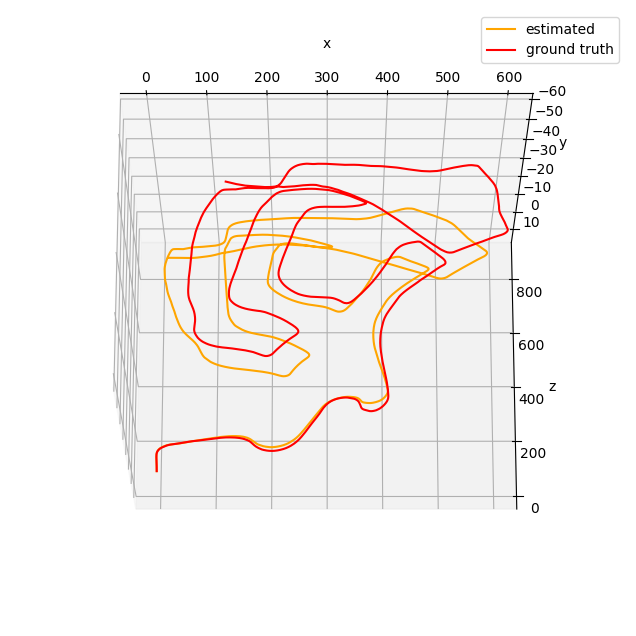

In [55]:
ViewPlot(v)

CALCULATE REPROJECTIONS

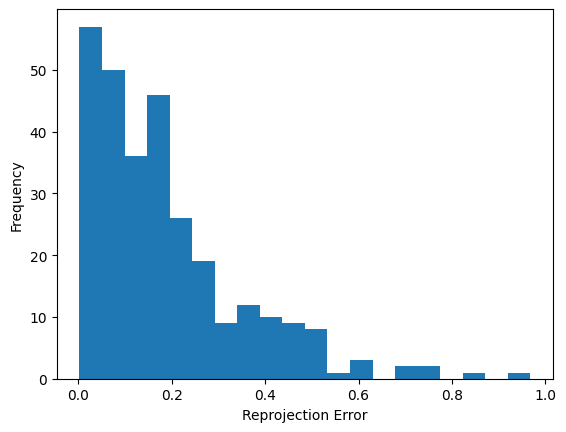

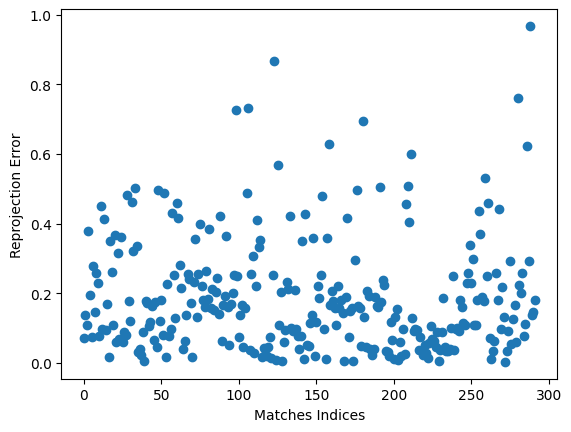

In [56]:
def reproj(matches, keypoints1, keypoints2, rmat, trans, kl, kr):
    errors = []
    for match in matches:
        query_idx = match.queryIdx
        train_idx = match.trainIdx
        kp1 = keypoints1[query_idx].pt
        kp2 = keypoints2[train_idx].pt
        
        M_r = np.hstack((rmat, trans))
        M_l = np.hstack((np.eye(3, 3), np.zeros((3, 1))))

        P_l = np.dot(kl, M_l)
        P_r = np.dot(kr, M_r)
        
        pts = cv2.triangulatePoints(P_l, P_r, np.expand_dims(kp1, axis=1), np.expand_dims(kp2, axis=1))
        Xp = pts[:3] / pts[3] 
        
        reproj2d = np.dot(P_r, np.append(Xp, 1))
        reprojections = reproj2d[:2] / reproj2d[2]
        
        error = np.linalg.norm(reprojections - kp2)
        errors.append(error)
    
    return errors

r = reproj(matchesf, keypf1, keypf2, rot, trans, Kleft, Kright)

# Set threshold
threshold = 3
indices = np.where(np.array(r) <= threshold)[0]
matches = [matchesf[i] for i in indices]

################ ERROR DISTRIBUTION $$$########################
plt.hist(r, bins=20)
plt.xlabel('Reprojection Error')
plt.ylabel('Frequency')
plt.show()

# Plot a scatter plot of errors
plt.scatter(range(len(indices)), [r[i] for i in indices])
plt.xlabel('Matches Indices')
plt.ylabel('Reprojection Error')
plt.show()


ERROR CALCULATION

In [57]:
#We define two errors - MEAN SQAURES AND MEAN AVERAGE ERRORS - Mathematically - 1/n* sum of (Y-Yi)**2 and  1/n sum of (yi-xi)
def mse(gt, est):
        err = np.sqrt((gt[50, 0, 3] - est[:, 0, 3])**2 
                    + (gt[50, 1, 3] - est[:, 1, 3])**2 
                    + (gt[50, 2, 3] - est[:, 2, 3])**2)**2
        mse = err.mean()
        return mse
    
def mae(gt, est):
        avg = np.sqrt((gt[50, 0, 3] - est[:, 0, 3])**2 
                    + (gt[50, 1, 3] - est[:, 1, 3])**2 
                    + (gt[50, 2, 3] - est[:, 2, 3])**2)
        mae = avg.mean()
        return mae

In [58]:
mse(groundt,v)

346597.4119400272

In [59]:
mae(groundt,v)

544.8858638101732

In [60]:
rmse=np.sqrt(mse(groundt,v))
rmse

588.7252431652878